# Time Domain Spectral Simulations

Demonstrate how to inspect simulated spectra produced using `quicktransients`.

In [1]:
import numpy as np

from astropy.io import fits
from astropy.table import Table, Column

from desispec.io.spectra import read_spectra

import matplotlib.pyplot as plt

## Input Files

The `quicktransients` program in the [desisim transients branch](https://github.com/desihub/desisim) will produce two FITS outputs:
1. A truth file with information about the templates used for each object.
2. A spect file with the templates "observed" under conditions specified by the user.

The spectra can then be coadded using the `desi_coadd_spectra` program available in [desispec](https://github.com/desihub/desispec).

In [2]:
truth_file = '../../bgs_2020-03-08_1000s_001_truth.fits'
spect_file = '../../bgs_2020-03-08_1000s_001_spect.fits'
coadd_file = '../../bgs_2020-03-08_1000s_001_coadd.fits'

### Contents of the Truth File

The truth file has the following tables:
1. A wavelength table called `WAVE`.
1. A flux table called `FLUX`.
1. A `TARGETS` table simulating a target list available in data.
1. A simulation `TRUTH` table with information about the object (redshift, flux, etc.).
1. A simulation `OBJTRUTH` table with line fluxes and other data generated for each object.

In [3]:
hdus = fits.open(truth_file)
hdus.info()

Filename: ../../bgs_2020-03-08_1000s_001_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  WAVE          1 PrimaryHDU       8   (32001,)   float64   
  1  FLUX          1 ImageHDU         9   (32001, 100)   float32   
  2  TARGETS       1 BinTableHDU    235   100R x 99C   [I, J, 8A, J, 4A, D, D, E, E, 5E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, B, B, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2A, K, E, E, E, E, E, E, E, E, K, E, L, E, E, E, E, E, E, I, E, 1A, K, K, K]   
  3  TRUTH         1 BinTableHDU     51   100R x 17C   [K, K, E, 10A, 10A, 10A, J, K, E, 15A, E, E, E, E, E, E, E]   
  4  OBJTRUTH      1 BinTableHDU     44   100R x 13C   [K, E, E, E, E, E, E, E, E, E, E, E, E]   


In [4]:
wave = hdus['WAVE'].data
flux = hdus['FLUX'].data
targets = Table.read(truth_file, 'TARGETS')
truth = Table.read(truth_file, 'TRUTH')
objtr = Table.read(truth_file, 'OBJTRUTH')

In [5]:
truth

TARGETID,MOCKID,TRUEZ,TRUESPECTYPE,TEMPLATETYPE,TEMPLATESUBTYPE,TEMPLATEID,SEED,MAG,MAGFILTER,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4
,,,,,,,,mag,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies
int64,int64,float32,str10,str10,str10,int32,int64,float32,str15,float32,float32,float32,float32,float32,float32,float32
125010001,41173040,0.3682551,GALAXY,BGS,,7529,789297822,19.297058,sdss2010-r,5.330383,21.230556,45.472126,61.830093,42.225636,0.0,0.0
125010002,38780297,0.5019314,GALAXY,BGS,,2358,240384145,20.13322,sdss2010-r,2.7131739,10.486824,21.669075,41.845654,28.71509,0.0,0.0
125010003,38089795,0.41849503,GALAXY,BGS,,6649,1001320464,19.787443,sdss2010-r,4.6751575,13.614248,26.265354,41.53576,28.792461,0.0,0.0
125010004,40663191,0.2351271,GALAXY,BGS,,1383,1850409618,19.752773,sdss2010-r,6.3787775,13.638141,21.560732,21.62519,15.799388,0.0,0.0
125010005,39856471,0.31975514,GALAXY,BGS,,518,659785949,19.56221,sdss2010-r,8.488254,15.792631,24.435303,28.1585,20.328812,0.0,0.0
125010006,41187475,0.26585877,GALAXY,BGS,,5693,664433299,19.761448,sdss2010-r,7.399825,12.947184,12.693209,9.805095,7.399226,0.0,0.0
125010007,40491449,0.18429552,GALAXY,BGS,,6188,346443727,19.031973,sdss2010-r,16.694126,25.795755,37.92152,48.24157,40.793945,0.0,0.0
125010008,38486081,0.40361816,GALAXY,BGS,,144,1894108499,19.993294,sdss2010-r,4.8083243,10.489323,13.894085,16.709179,13.174752,0.0,0.0


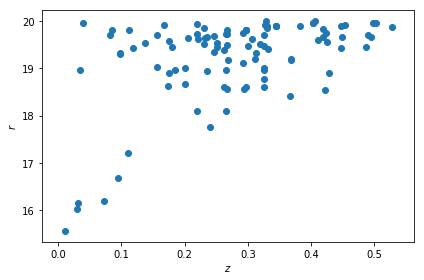

In [6]:
r = 22.5 - 2.5*np.log10(truth['FLUX_R'])
z = truth['TRUEZ']

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(z, r)
ax.set(xlabel='$z$', ylabel='$r$')
fig.tight_layout();

In [7]:
targets

RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ [5],FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_R_IVAR,SHAPEDEV_E1,SHAPEDEV_E1_IVAR,SHAPEDEV_E2,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_R_IVAR,SHAPEEXP_E1,SHAPEEXP_E1_IVAR,SHAPEEXP_E2,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,EBV,PHOTSYS,DESI_TARGET,BGS_TARGET,MWS_TARGET
,,,,,deg,deg,1 / deg2,1 / deg2,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,,,,,,,,,,,,,,,,,,,,,,,,,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,1/nanomaggies**2,,,arcsec,1 / arcsec2,,,,,arcsec,1 / arcsec2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int16,int32,str8,int32,str4,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str2,int64,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,bool,float32,float32,float32,float32,float32,float32,int16,float32,str1,int64,int64,int64
9999,412939,3202p142,125010001,DEV,320.2330017089844,14.179980278015137,100000000.0,100000000.0,0.0 .. 400.0,4.4627485,18.72396,42.418255,61.27768,43.06365,0.0,0.0,1438.5999,329.56418,62.79716,0.82114905,0.32476774,0.0,0.0,0.8343258,0.885137,0.9335023,0.9896839,0.9936519,0.99864274,0.9994873,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,52.480747,7.7268057,1.8706821,57.543995,13.182568,2.5118864,1.0,0.0,0.7048849,84696.83,0.2022668,3153620800000000.0,0.26551306,57490.336,0.0,0.0,0.0,0.0,0.0,0.0,1.4454584,6.352875,15.162574,1.4454584,6.352875,15.162574,,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0,0.0611888,S,0,0,0
9999,411541,3202p140,125010002,REX,320.1145324707031,14.093770027160645,100000000.0,100000000.0,0.0 .. 400.0,2.2804651,9.226392,20.324371,39.137863,28.021858,0.0,0.0,1438.5999,329.56418,62.79716,0.82084167,0.32464975,0.0,0.0,0.8346984,0.8854033,0.9336606,0.9897092,0.9936675,0.9986461,0.99948853,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,52.480747,7.7268057,1.8706821,57.543995,13.182568,2.5118864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5156988,11041.224,0.0,0.0,0.0,0.0,0.3423522,1.4211102,3.2240653,0.3423522,1.4211102,3.2240653,,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0,0.061037976,S,0,0,0
9999,414334,3198p145,125010003,REX,319.8711242675781,14.447369575500488,100000000.0,100000000.0,0.0 .. 400.0,3.8258688,11.883929,24.351095,41.177048,27.724693,0.0,0.0,1438.5999,329.56418,62.79716,0.8239639,0.32584804,0.0,0.0

In [8]:
objtr

TARGETID,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,TRUEZ_NORSD
,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,Dex,Dex,Dex,Dex,
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
125010001,-1.0,0.0,-1.0,0.0,1.8182646,77.07382,0.72379166,0.23740761,0.37673977,-0.29634327,-0.02183539,0.0
125010002,-1.0,0.0,-1.0,0.0,1.5314834,77.07382,0.7682242,0.16747032,0.4726649,-0.44466257,-0.0034817976,0.0
125010003,-1.0,1.3376049e-16,-1.0,3.7209105,1.3772767,177.4381,0.73264855,0.27672964,0.33001444,-0.5840292,-0.5343328,0.0
125010004,-1.0,0.0,-1.0,0.0,1.8869052,111.23943,0.67308843,-0.9995098,0.3716174,-0.06622653,-0.3029371,0.0
125010005,-1.0,0.0,-1.0,0.0,1.6416233,177.4381,0.6853782,0.12100406,0.14466086,-1.35033,-0.6486489,0.0
125010006,-1.0,1.2621244e-16,-1.0,7.0790215,1.2099175,177.4381,0.6885189,0.6945736,0.37655237,-0.7767059,-0.5890338,0.0
125010007,-1.0,1.6352882e-16,-1.0,2.88135,1.1890434,77.07382,0.67936075,0.34279606,0.3466218,-0.53994256,-0.42062563,0.0
125010008,-1.0,1.08914256e-16,-1.0,6.097568,1.2521485,111.23943,0.80608493,0.70505065,0.2992455,-0.82771343,-0.5533784,0.0


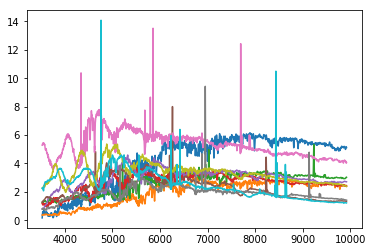

In [9]:
for i in range(10):
    plt.plot(wave, flux[i])

### Observed Spectra

The spectra generated under observing conditions are stored in a single file. A `FIBERMAP` table provides a summary of target data for each object, and individual wavelength, flux, variance, resolution, and mask tables are present for each camera.

The data are best accessed using the `read_spectra` function from [desispec](https://github.com/desihub/desispec), which packs everything into a single object.

In [10]:
spectra = read_spectra(spect_file)
hdus = fits.open(spect_file)
hdus.info()

Filename: ../../bgs_2020-03-08_1000s_001_spect.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  FIBERMAP      1 BinTableHDU    164   100R x 76C   [K, K, K, K, K, D, D, D, D, K, K, 4A, J, D, K, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 1A, J, K, K, J, K, J, J, J, J, J, 3A, E, E, E, K, B, I, D, D, E, E, E, E, E, E, J, J, J, J, J]   
  2  B_WAVELENGTH    1 ImageHDU        10   (2380,)   float64   
  3  B_FLUX        1 ImageHDU        11   (2380, 100)   float32   
  4  B_IVAR        1 ImageHDU        11   (2380, 100)   float32   
  5  B_MASK        1 ImageHDU        12   (2380, 100)   int32 (rescales to uint32)   
  6  B_RESOLUTION    1 ImageHDU        11   (2380, 9, 100)   float32   
  7  R_WAVELENGTH    1 ImageHDU        10   (2116,)   float64   
  8  R_FLUX        1 ImageHDU        11   (2116, 100)   float32   
  9  R_IVAR        1 ImageHDU        11   (2116, 100)   

In [11]:
spectra.fibermap

TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SECONDARY_TARGET,TARGET_RA,TARGET_DEC,TARGET_RA_IVAR,TARGET_DEC_IVAR,BRICKID,BRICK_OBJID,MORPHTYPE,PRIORITY,SUBPRIORITY,REF_ID,PMRA,PMDEC,REF_EPOCH,PMRA_IVAR,PMDEC_IVAR,RELEASE,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERFLUX_W1,FIBERFLUX_W2,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,FIBERTOTFLUX_W1,FIBERTOTFLUX_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,EBV,PHOTSYS,OBSCONDITIONS,NUMOBS_INIT,PRIORITY_INIT,NUMOBS_MORE,HPXPIXEL,FIBER,PETAL_LOC,DEVICE_LOC,LOCATION,FIBERSTATUS,OBJTYPE,LAMBDA_REF,FIBERASSIGN_X,FIBERASSIGN_Y,FA_TARGET,FA_TYPE,NUMTARGET,FIBER_RA,FIBER_DEC,FIBER_RA_IVAR,FIBER_DEC_IVAR,PLATEMAKER_X,PLATEMAKER_Y,PLATEMAKER_RA,PLATEMAKER_DEC,NUM_ITER,SPECTROID,NIGHT,EXPID,TILEID
int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes4,int32,float64,int64,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int32,int64,int64,int32,int64,int32,int32,int32,int32,int32,bytes3,float32,float32,float32,int64,uint8,int16,float64,float64,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32
125010001,1152921504606846976,0,0,0,320.2330017089844,14.179980278015137,0.0,0.0,412939,125010001,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,4.4627485,18.72396,42.418255,61.27768,43.06365,1438.5999,329.56418,62.79716,0.82114905,0.32476774,1.4454584,6.352875,15.162574,0.0,0.0,1.4454584,6.352875,15.162574,0.0,0.0,0.8343258,0.885137,0.9335023,0.0611888,S,0,0,0,0,0,0,0,311,311,0,,5400.0,83.21898,-286.66373,0,0,0,320.2330017089844,14.179980278015137,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
125010002,1152921504606846976,0,0,0,320.1145324707031,14.093770027160645,0.0,0.0,411541,125010002,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,2.2804651,9.226392,20.324371,39.137863,28.021858,1438.5999,329.56418,62.79716,0.82084167,0.32464975,0.3423522,1.4211102,3.2240653,0.0,0.0,0.3423522,1.4211102,3.2240653,0.0,0.0,0.8346984,0.8854033,0.9336606,0.061037976,S,0,0,0,0,0,1,0,272,272,0,,5400.0,59.109577,-273.27396,0,0,0,320.1145324707031,14.093770027160645,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
125010003,1152921504606846976,0,0,0,319.8711242675781,14.447369575500488,0.0,0.0,414334,125010003,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,3.8258688,11.883929,24.351095,41.177048,27.724693,1438.5999,329.56418,62.79716,0.8239639,0.32584804,1.7161739,5.5888886,12.075938,0.0,0.0,1.7161739,5.5888886,12.075938,0.0,0.0,0.82198334,0.87629515,0.9282317,0.066223554,S,0,0,0,0,0,2,0,252,252,0,,5400.0,31.751867,-269.80435,0,0,0,319.8711242675781,14.447369575500488,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
125010004,1152921504606846976,0,0,0,320.2393798828125,14.492692947387695,0.0,0.0,414335,125010004,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,5.4450307,12.125675,20.126537,21.374046,15.897823,1438.5999,329.56418,62.79716,0.8233456,0.32561076,1.3976139,3.221324,5.560153,0.0,0.0,1.3976139,3.221324,5.560153,0.0,0.0,0.85057634,0.8967137,0.9403685,0.054672297,S,0,0,0,0,0,3,0,156,156,0,,5400.0,0.18432418,-221.17873,0,0,0,320.2393798828125,14.492692947387695,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
125010005,1152921504606846976,0,0,0,319.651611328125,14.462960243225098,0.0,0.0,414333,125010005,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,6.7800317,13.587111,22.250353,29.974606,20.606443,1438.5999,329.56418,62.79716,0.82463783,0.32610667,1.5069036,3.1509864,5.413464,0.0,0.0,1.5069036,3.1509864,5.413464,0.0,0.0,0.79993945,0.8603948,0.91869503,0.07540672,S,0,0,0,0,0,4,0,198,198,0,,5400.0,-19.776659,-253.03535,0,0,0,319.651611328125,14.462960243225098,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0
125010006,1152921504606846976,0,0,0,319.5744934082031,14.747235298156738,0.0,0.0,415727,125010006,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,6.019098,11.276788,11.709034,8.474762,9.364524,1438.

### Coadd Files

The coadds are generated using the `desi_coadd_spectra` program available in [desispec](https://github.com/desihub/desispec). For example, to add data across the cameras run

```
desi_coadd_spectra -i bgs_2020-03-08_0150s_001_spect.fits -o bgs_2020-03-08_0150s_001_coadd.fits --coadd-cameras
```

The data can then be accessed using the `read_spectra` function.

In [12]:
coadds = read_spectra(coadd_file)
hdus = fits.open(coadd_file)
hdus.info()

Filename: ../../bgs_2020-03-08_1000s_001_coadd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  FIBERMAP      1 BinTableHDU    196   100R x 92C   [K, K, K, K, K, D, D, D, D, K, K, 4A, J, D, K, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 1A, J, K, K, J, K, J, J, J, J, J, 3A, E, E, E, K, B, I, D, D, E, E, E, E, E, E, J, J, J, J, J, I, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K]   
  2  BRZ_WAVELENGTH    1 ImageHDU        10   (6265,)   float64   
  3  BRZ_FLUX      1 ImageHDU        11   (6265, 100)   float32   
  4  BRZ_IVAR      1 ImageHDU        11   (6265, 100)   float32   
  5  BRZ_MASK      1 ImageHDU        12   (6265, 100)   int32 (rescales to uint32)   
  6  BRZ_RESOLUTION    1 ImageHDU        11   (6265, 11, 100)   float32   
  7  SCORES        1 BinTableHDU     30   100R x 9C   [D, D, D, D, D, D, D, D, D]   


In [13]:
coadds.fibermap

TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SECONDARY_TARGET,TARGET_RA,TARGET_DEC,TARGET_RA_IVAR,TARGET_DEC_IVAR,BRICKID,BRICK_OBJID,MORPHTYPE,PRIORITY,SUBPRIORITY,REF_ID,PMRA,PMDEC,REF_EPOCH,PMRA_IVAR,PMDEC_IVAR,RELEASE,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERFLUX_W1,FIBERFLUX_W2,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,FIBERTOTFLUX_W1,FIBERTOTFLUX_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,EBV,PHOTSYS,OBSCONDITIONS,NUMOBS_INIT,PRIORITY_INIT,NUMOBS_MORE,HPXPIXEL,FIBER,PETAL_LOC,DEVICE_LOC,LOCATION,FIBERSTATUS,OBJTYPE,LAMBDA_REF,FIBERASSIGN_X,FIBERASSIGN_Y,FA_TARGET,FA_TYPE,NUMTARGET,FIBER_RA,FIBER_DEC,FIBER_RA_IVAR,FIBER_DEC_IVAR,PLATEMAKER_X,PLATEMAKER_Y,PLATEMAKER_RA,PLATEMAKER_DEC,NUM_ITER,SPECTROID,NIGHT,EXPID,TILEID,COADD_NUMEXP,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_SPECTROID,LAST_SPECTROID,NUM_SPECTROID,FIRST_FIBER,LAST_FIBER,NUM_FIBER
int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes4,int32,float64,int64,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int32,int64,int64,int32,int64,int32,int32,int32,int32,int32,bytes3,float32,float32,float32,int64,uint8,int16,float64,float64,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int16,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
125010001,1152921504606846976,0,0,0,320.2330017089844,14.179980278015137,0.0,0.0,412939,125010001,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,4.4627485,18.72396,42.418255,61.27768,43.06365,1438.5999,329.56418,62.79716,0.82114905,0.32476774,1.4454584,6.352875,15.162574,0.0,0.0,1.4454584,6.352875,15.162574,0.0,0.0,0.8343258,0.885137,0.9335023,0.0611888,S,0,0,0,0,0,0,0,311,311,0,,5400.0,83.21898,-286.66373,0,0,0,320.2330017089844,14.179980278015137,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,0,0,1
125010002,1152921504606846976,0,0,0,320.1145324707031,14.093770027160645,0.0,0.0,411541,125010002,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,2.2804651,9.226392,20.324371,39.137863,28.021858,1438.5999,329.56418,62.79716,0.82084167,0.32464975,0.3423522,1.4211102,3.2240653,0.0,0.0,0.3423522,1.4211102,3.2240653,0.0,0.0,0.8346984,0.8854033,0.9336606,0.061037976,S,0,0,0,0,0,1,0,272,272,0,,5400.0,59.109577,-273.27396,0,0,0,320.1145324707031,14.093770027160645,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,1,1,1
125010003,1152921504606846976,0,0,0,319.8711242675781,14.447369575500488,0.0,0.0,414334,125010003,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,3.8258688,11.883929,24.351095,41.177048,27.724693,1438.5999,329.56418,62.79716,0.8239639,0.32584804,1.7161739,5.5888886,12.075938,0.0,0.0,1.7161739,5.5888886,12.075938,0.0,0.0,0.82198334,0.87629515,0.9282317,0.066223554,S,0,0,0,0,0,2,0,252,252,0,,5400.0,31.751867,-269.80435,0,0,0,319.8711242675781,14.447369575500488,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,2,2,1
125010004,1152921504606846976,0,0,0,320.2393798828125,14.492692947387695,0.0,0.0,414335,125010004,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,5.4450307,12.125675,20.126537,21.374046,15.897823,1438.5999,329.56418,62.79716,0.8233456,0.32561076,1.3976139,3.221324,5.560153,0.0,0.0,1.3976139,3.221324,5.560153,0.0,0.0,0.85057634,0.8967137,0.9403685,0.054672297,S,0,0,0,0,0,3,0,156,156,0,,5400.0,0.18432418,-221.17873,0,0,0,320.2393798828125,14.492692947387695,0.0,0.0,0.0,0.0,0.0,0.0,2,0,20200307,0,0,1,20200307,20200307,1,0,0,1,0,0,1,0,0,1,3,3,1
125010005,1152921504606846976,0,0,0,319.651611328125,14.462960243225098,0.0,0.0,414333,125010005,,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,6.7800317,13.587111,22.250353,29.974606,20.606443,1438.5999,329.5

### Spectral Scores

Per-camera median coadded fluxes and SNRs are available in a scores table.

The code below computes a total SNR and adds it to the table.

In [14]:
totsnr = None
for cam in 'BRZ':
    camsnr = coadds.scores['MEDIAN_COADD_SNR_{}'.format(cam)]
    if totsnr is None:
        totsnr = camsnr**2
    else:
        totsnr += camsnr**2
totsnr = np.sqrt(totsnr)

coadds.scores.add_column(Column(totsnr, name='MEDIAN_COADD_SNR'))
coadds.scores

INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,MEDIAN_COADD_SNR
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4253.172804328821,2.383292317390442,2.341412939590384,9256.03789077278,5.172584295272827,6.738218714855115,12262.660014096275,5.580670118331909,8.413858793945636,11.030812563331919
1932.1721848140505,1.1122698187828064,1.266935254139209,4497.32500433845,2.5101826651500163,3.882190696468651,5742.691975723016,2.6178290843963623,4.785842063030894,6.291328460206503
3454.666807730283,1.926780879497528,1.9999079270951174,5524.492168788723,3.0551578998565674,4.4294169194730095,7070.999528034746,3.1936956644058228,5.487883610354029,7.3305001523882405
4718.997753623529,2.6763163805007935,2.1249985773744005,5645.4019414815,3.1584198571148017,3.591578580412352,6032.871075762708,2.7357630729675293,3.7641458906959633,5.61995106202566
5493.5461937038035,3.151136875152588,2.87818242366131,6221.536935208604,3.434026387583808,4.492201606421105,6488.166818944054,2.9630905389785767,4.677110241546297,7.095010186615838
4930.80398514868,2.863329768180847,2.4567474642892164,4788.427619715781,2.643408179283142,3.2311178729874683,3713.16958428417,1.6845331192016602,2.489962326386574,4.761894916863978
10982.7554297848,6.175144101791517,3.8983425779070187,10207.580309630339,5.618435382843018,5.138869480373037,10253.19336937476,4.633976221084595,5.142960529212208,8.249551345137922
3635.3960993877467,2.0408146381378174,2.072909297586409,4077.9498381028134,2.200263261795044,3.2377500466216054,3885.187528052722,1.7453103065490723,3.1347142779726425,4.960485049362001
7136.120931446768,4.092654596873958,3.3822050973032525,6357.107715197618,3.5156612396240234,4.154764578071621,6298.86866227786,2.8658246994018555,4.171512909748904,6.789911632387017


### Plot Results

To visualize the results, the templates, camera data, and coadds for the first 10 spectra in the input files listed at the top of this notebook are plotted.

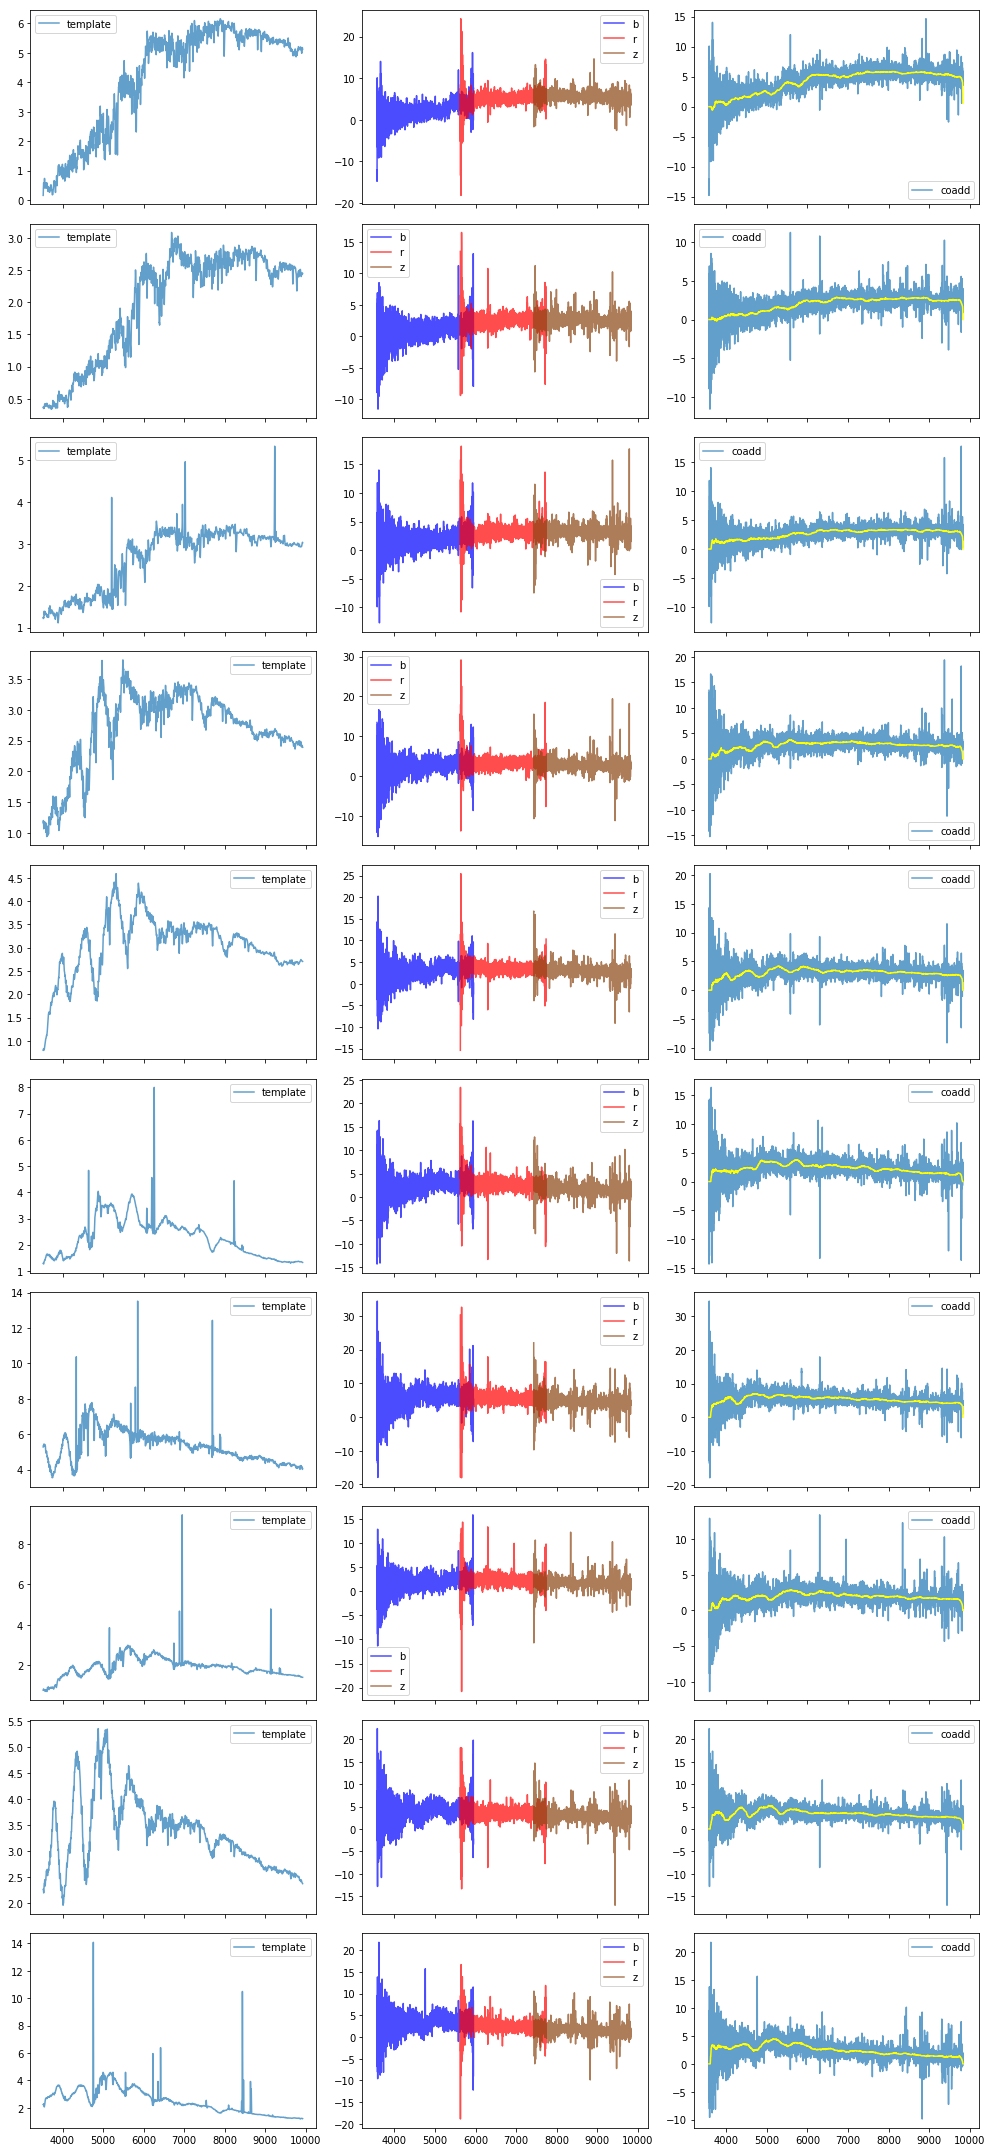

In [15]:
from scipy.signal import medfilt

fig, axes = plt.subplots(10,3, figsize=(14,30), sharex=True)
for i in range(10):
    axes[i,0].plot(wave, flux[i], alpha=0.7, label='template')
    axes[i,0].legend()
    
    for _filt, _col in zip(spectra.bands, ['b', 'r', 'saddlebrown']):
        wl = spectra.wave[_filt]
        fl = spectra.flux[_filt][i]
        axes[i,1].plot(wl, fl, color=_col, alpha=0.7, label=_filt)
    axes[i,1].legend()
    
    axes[i,2].plot(coadds.wave['brz'], coadds.flux['brz'][i], alpha=0.7, label='coadd')
    axes[i,2].plot(coadds.wave['brz'], medfilt(coadds.flux['brz'][i], 149), color='yellow')
    axes[i,2].legend()

fig.tight_layout();